In [5]:
!pip install pandas_datareader
!pip install keras
!pip install tensorflow

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [3]:
df=pd.read_csv("TSLA.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-27,263.809998,275.926666,261.790009,274.820007,274.820007,88110000
1,2022-07-28,280.066681,283.299988,272.799988,280.899994,280.899994,84723000
2,2022-07-29,280.700012,298.320007,279.100006,297.149994,297.149994,95313000
3,2022-08-01,301.276672,311.876678,295.000000,297.276672,297.276672,117042900
4,2022-08-02,294.003326,307.833344,292.666656,300.586670,300.586670,95577600
...,...,...,...,...,...,...,...
246,2023-07-20,279.559998,280.929993,261.200012,262.899994,262.899994,175158300
247,2023-07-21,268.000000,268.000000,255.800003,260.019989,260.019989,161050100
248,2023-07-24,255.850006,269.850006,254.119995,269.059998,269.059998,136508500
249,2023-07-25,272.380005,272.899994,265.000000,265.279999,265.279999,112757300


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [6]:
df.shape

(251, 6)

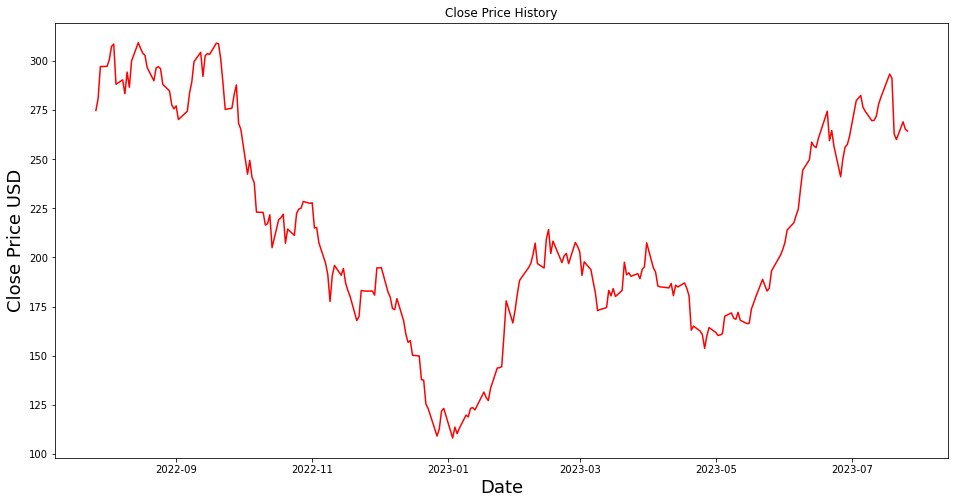

In [7]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [8]:
data = df.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

201

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.82854588],
       [0.8587615 ],
       [0.93951887],
       [0.94014842],
       [0.95659807],
       [0.99044161],
       [0.99658744],
       [0.8948912 ],
       [0.90608952],
       [0.87085448],
       [0.92563688],
       [0.88723784],
       [0.95383159],
       [1.        ],
       [0.98630015],
       [0.97354471],
       [0.96794547],
       [0.93711684],
       [0.90355493],
       [0.93605672],
       [0.93925392],
       [0.93415168],
       [0.89449354],
       [0.87824272],
       [0.84285859],
       [0.83247182],
       [0.84017493],
       [0.80563555],
       [0.82655803],
       [0.8726767 ],
       [0.90030814],
       [0.95209217],
       [0.97564857],
       [0.91457111],
       [0.96665331],
       [0.97231882],
       [0.97033098],
       [0.99875758],
       [0.99706791],
       [0.95765819],
       [0.89697838],
       [0.83108032],
       [0.83445982],
       [0.86889969],
       [0.89310204],
       [0.79569618],
       [0.78098596],
       [0.667

In [10]:
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.82854588, 0.8587615 , 0.93951887, 0.94014842, 0.95659807,
       0.99044161, 0.99658744, 0.8948912 , 0.90608952, 0.87085448,
       0.92563688, 0.88723784, 0.95383159, 1.        , 0.98630015,
       0.97354471, 0.96794547, 0.93711684, 0.90355493, 0.93605672,
       0.93925392, 0.93415168, 0.89449354, 0.87824272, 0.84285859,
       0.83247182, 0.84017493, 0.80563555, 0.82655803, 0.8726767 ,
       0.90030814, 0.95209217, 0.97564857, 0.91457111, 0.96665331,
       0.97231882, 0.97033098, 0.99875758, 0.99706791, 0.95765819,
       0.89697838, 0.83108032, 0.83445982, 0.86889969, 0.89310204,
       0.79569618, 0.78098596, 0.66742864, 0.70241526, 0.65952686,
       0.64620814, 0.57136469, 0.57081803, 0.53871383, 0.54239142,
       0.56465559, 0.48151279, 0.55287746, 0.55705198, 0.56624585])]
[0.4928933334855383]



In [11]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [12]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(141, 60, 1)

In [13]:
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
model.fit(x_train,y_train, batch_size=1, epochs=10)


Epoch 1/10
141/141 [==============================] - 7s 24ms/step - loss: 0.0115
Epoch 2/10
141/141 [==============================] - 3s 24ms/step - loss: 0.0051
Epoch 3/10
141/141 [==============================] - 4s 26ms/step - loss: 0.0028
Epoch 4/10
141/141 [==============================] - 3s 24ms/step - loss: 0.0029
Epoch 5/10
141/141 [==============================] - 3s 24ms/step - loss: 0.0029
Epoch 6/10
141/141 [==============================] - 3s 24ms/step - loss: 0.0024
Epoch 7/10
141/141 [==============================] - 3s 23ms/step - loss: 0.0023
Epoch 8/10
141/141 [==============================] - 4s 26ms/step - loss: 0.0026
Epoch 9/10
141/141 [==============================] - 4s 25ms/step - loss: 0.0023
Epoch 10/10
141/141 [==============================] - 4s 25ms/step - loss: 0.0020


In [16]:
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [17]:
x_test = np.array(x_test)

In [18]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(50, 60, 1)

In [19]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 17ms/step


C:\Users\Yelim\anaconda3 a\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


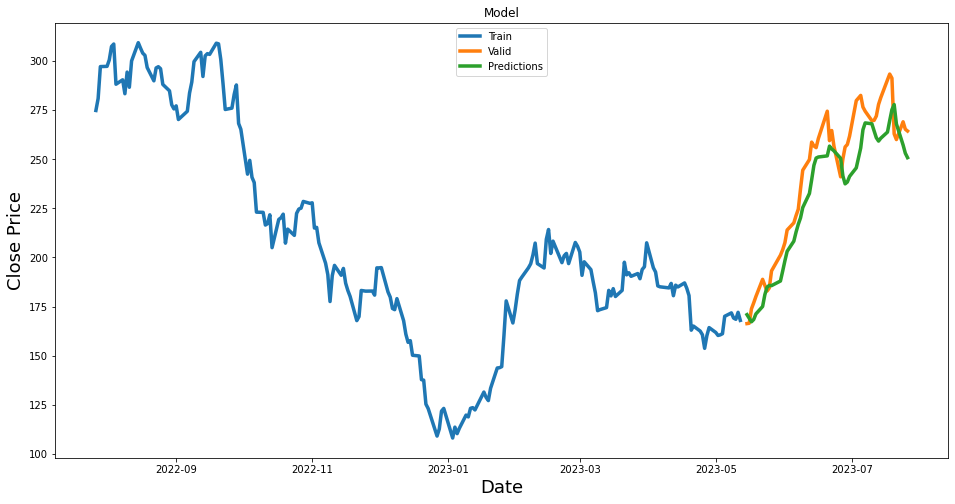

In [20]:
train = data[:training_data_len]
valid = data[training_data_len:]
#valid['Predictions'] = predictions
valid.loc[:, 'Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'], linewidth=3.5)
plt.plot(valid['Close'], linewidth=3.5)
plt.plot(valid['Predictions'], linewidth=3.5)
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper center')

In [21]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

10.307538768222654

In [22]:
tesla_quote = pd.read_csv('TSLA.csv')
#Create new data frame
new_df = tesla_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scaled the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price= model.predict(X_test)
#undo the scalling
pred_price = scaler.inverse_transform(pred_price)
pred_price


1/1 [==============================] - 0s 30ms/step


array([[249.96413]], dtype=float32)

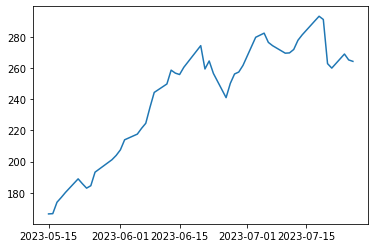

In [23]:
plt.plot(valid['Close'], label='Actual') 

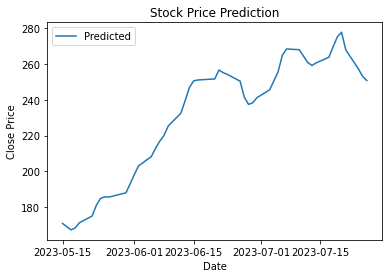

In [24]:
plt.plot(valid['Predictions'], label='Predicted')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()


In [29]:
plt.show()